# **Диагностическая работа по библиотеке Pandas**


In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Задание 1**


Проанализируйте зависимость между портом посадки (Embarked) и вероятностью выживания пассажиров (Survived). Рассчитайте процент выживших для каждого порта посадки (Southampton - 'S', Cherbourg - 'C', Queenstown - 'Q'). Какой порт посадки связан с наибольшим процентом выживших пассажиров? Обоснуйте, почему так могло произойти.

In [3]:
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


## **Задание 2**


Исследуйте влияние наличия родственников на борту (SibSp - количество братьев/сестер/супругов и Parch - количество родителей/детей) на вероятность выживания. Создайте новую переменную "Family_Size", равную сумме SibSp и Parch плюс 1 (сам пассажир). Разделите пассажиров на группы: одиночки (Family_Size = 1), малые семьи (2-4) и большие семьи (5+). Для какой группы процент выживания был наибольшим?

In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Family_Group'] = pd.cut(df['Family_Size'], 
                            bins=[0, 1, 4, float('inf')], 
                            labels=['Alone', 'Small Family', 'Large Family'])

survival_by_family_size = df.groupby('Family_Group')['Survived'].mean()
print(survival_by_family_size)

Family_Group
Alone           0.303538
Small Family    0.578767
Large Family    0.161290
Name: Survived, dtype: float64


C:\Users\Owl\AppData\Local\Temp\ipykernel_11200\2357192276.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_family_size = df.groupby('Family_Group')['Survived'].mean()


## **Задание 3**


Проведите анализ возрастных групп пассажиров с учетом пола и класса. Создайте возрастные категории: дети (до 18 лет), молодые взрослые (18-35), взрослые среднего возраста (36-55) и пожилые (старше 55). Определите, какая комбинация возрастной категории, пола и класса имела наивысший процент выживания, а какая - наименьший. Визуализируйте результаты с помощью подходящего графика.

0      Young Adults
1       Middle Aged
2      Young Adults
3      Young Adults
4      Young Adults
           ...     
886    Young Adults
887    Young Adults
888    Young Adults
889    Young Adults
890    Young Adults
Name: Age_Group, Length: 891, dtype: category
Categories (4, object): ['Children' < 'Young Adults' < 'Middle Aged' < 'Elderly']
Pclass                      1         2         3
Age_Group    Sex                                 
Children     female  0.909091  1.000000  0.511628
             male    0.800000  0.600000  0.215686
Young Adults female  0.977778  0.928571  0.546512
             male    0.392157  0.095238  0.133065
Middle Aged  female  0.967742  0.894737  0.142857
             male    0.382979  0.041667  0.071429
Elderly      female  1.000000  0.000000  1.000000
             male    0.157895  0.166667  0.000000


C:\Users\Owl\AppData\Local\Temp\ipykernel_11200\4268396223.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = df.groupby(['Age_Group', 'Sex', 'Pclass'])['Survived'].mean().unstack()


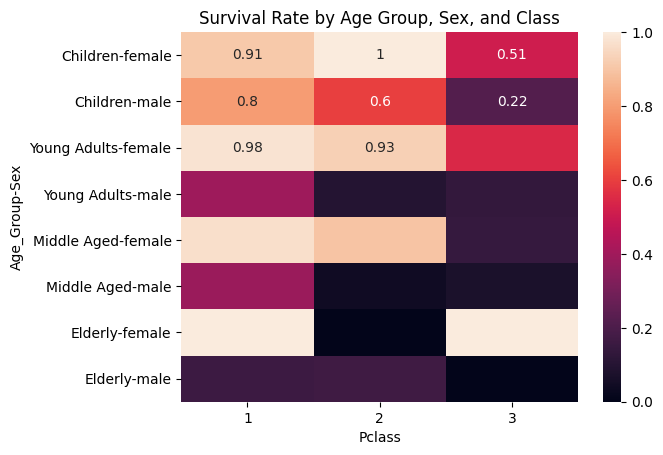

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 18, 35, 55, float('inf')], 
                         labels=['Children', 'Young Adults', 'Middle Aged', 'Elderly'])

print(df['Age_Group'])

survival = df.groupby(['Age_Group', 'Sex', 'Pclass'])['Survived'].mean().unstack()
print(survival)

sns.heatmap(survival, annot=True)
plt.title('Survival Rate by Age Group, Sex, and Class')
plt.show()

## **Задание 4**


Проанализируйте распределение стоимости билетов (Fare) в зависимости от класса (Pclass). Рассчитайте средние значения, медианы и интерквартильные размахи. Найдите и опишите выбросы в данных о стоимости билетов. Определите, существуют ли пассажиры третьего класса, которые заплатили за билет больше, чем некоторые пассажиры первого класса? Если да, то сколько таких пассажиров?

             mean   median
Pclass                    
1       84.154687  60.2875
2       20.662183  14.2500
3       13.675550   8.0500


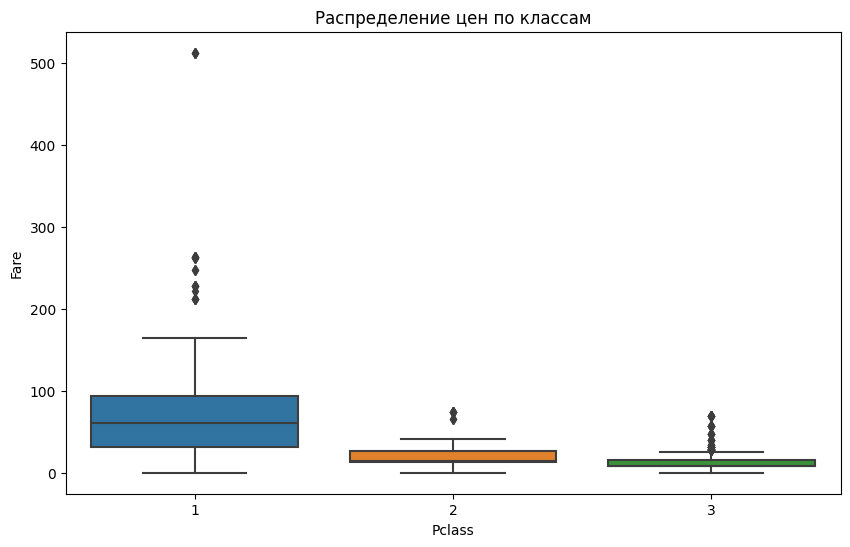

Pclass
1    20
2     7
3    52
Name: Fare, dtype: int64
Пассажиров 3-го класса, заплативших больше медианы 1-го класса: 7


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fare_stats = df.groupby('Pclass')['Fare'].agg(['mean', 'median'])
print(fare_stats)

def find_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    return outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Распределение цен по классам')
plt.show()

outliers_by_class = df.groupby('Pclass')['Fare'].apply(find_outliers)


outliers_count = outliers_by_class.groupby('Pclass').count()
print(outliers_count)

median_fare_1st = df[df['Pclass'] == 1]['Fare'].median()

third_class_above_median = df[(df['Pclass'] == 3) & (df['Fare'] > median_fare_1st)]
print(f"Пассажиров 3-го класса, заплативших больше медианы 1-го класса: {len(third_class_above_median)}")

## **Задание 5**



Проведите анализ выживаемости на основе информации о каютах пассажиров (Cabin). Несмотря на то, что многие значения отсутствуют, первая буква номера каюты указывает на палубу. Создайте новую переменную "Deck", извлекая первую букву из номера каюты. Исследуйте связь между палубой и вероятностью выживания. Учитывайте также отсутствующие значения как отдельную категорию. Как расположение каюты (палуба) влияло на шансы выживания пассажира?

In [32]:
#print(df['Cabin'])
df['Deck'] = df['Cabin'].str[0] 
df['Deck'] = df['Deck'].fillna('Unknown') 
print(df['Deck'].value_counts())


survival_by_deck = df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)
print(survival_by_deck)

Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
Deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
U    0.299854
T    0.000000
Name: Survived, dtype: float64
